In [1]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Conv2D, MaxPooling2D, GlobalMaxPooling2D

In [4]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Conv2D, MaxPooling2D, GlobalMaxPooling2D,BatchNormalization

batch_size = 32 
num_classes = 10
#epochs = 1600
data_augmentation = True

# The data, shuffled and split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [2]:
batch_size = 32 
num_classes = 10
epochs = 100
data_augmentation = True

In [6]:
from keras.utils import np_utils

In [7]:
# Convert class vectors to binary class matrices.
y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)
y_test = keras.utils.np_utils.to_categorical(y_test, num_classes)

In [8]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [9]:
model = Sequential()

model.add(Conv2D(32, (3, 3),kernel_initializer='random_normal',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3),kernel_initializer='random_normal',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3),kernel_initializer='random_normal',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(48, (3, 3),kernel_initializer='random_normal',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(48, (3, 3),kernel_initializer='random_normal',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(GlobalMaxPooling2D())
model.add(Dense(500))
model.add(Dropout(0.25))
model.add(Dense(num_classes))
model.add(Activation('softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 activation (Activation)     (None, 30, 30, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 28, 28, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        9248      
                                                                 
 activation_2 (Activation)   (None, 26, 26, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 48)        1

In [10]:
#opt = keras.optimizers.RMSProp(lr=0.0001)
model.compile(loss='categorical_crossentropy',
              optimizer="RMSProp",
              metrics=['accuracy'])

In [13]:
m1=model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=5,
              validation_data=(x_test, y_test),
              shuffle=True)

Epoch 1/5
1563/1563 [==============================] - 320s 205ms/step - loss: 1.6237 - accuracy: 0.4002 - val_loss: 1.5822 - val_accuracy: 0.4162
Epoch 2/5
1563/1563 [==============================] - 313s 200ms/step - loss: 1.3940 - accuracy: 0.4936 - val_loss: 1.2927 - val_accuracy: 0.5304
Epoch 3/5
1563/1563 [==============================] - 321s 205ms/step - loss: 1.2799 - accuracy: 0.5399 - val_loss: 1.2354 - val_accuracy: 0.5500
Epoch 4/5
1563/1563 [==============================] - 325s 208ms/step - loss: 1.2081 - accuracy: 0.5681 - val_loss: 1.2558 - val_accuracy: 0.5467
Epoch 5/5
1563/1563 [==============================] - 324s 207ms/step - loss: 1.1503 - accuracy: 0.5882 - val_loss: 1.2431 - val_accuracy: 0.5552


In [15]:
import matplotlib.pyplot as plt
import seaborn as sb

KeyError: ignored

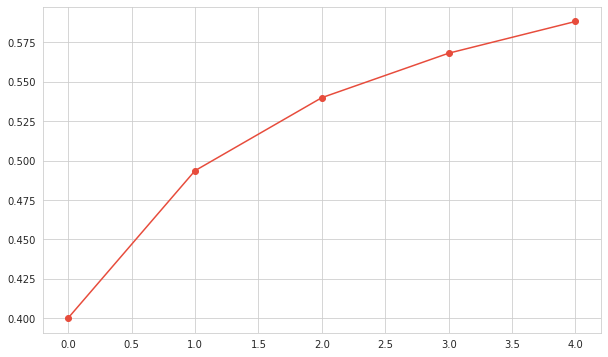

In [19]:
plt.figure(figsize=(10,6))
sb.set_style("whitegrid")
plt.plot(m1.history['accuracy'],color="#E74C3C",marker='o')
plt.plot(m1.history['val_acc'],color='#641E16',marker='h')
plt.title('Accuracy comparison between Validation and Train Data set',fontsize=15)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

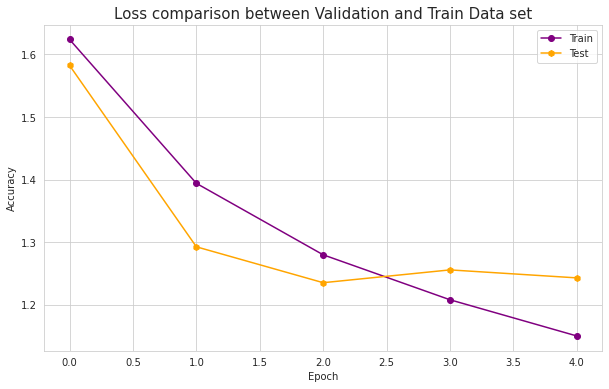

In [18]:
plt.figure(figsize=(10,6))
sb.set_style("whitegrid")
plt.plot(m1.history['loss'],color="Purple",marker='o')
plt.plot(m1.history['val_loss'],color='Orange',marker='h')
plt.title('Loss comparison between Validation and Train Data set',fontsize=15)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()